##  Import needed libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.array_algos import replace
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline 

## Read data from csv file with results of clustering.
Variable 'labels' contains the information about the clusters formed by k-means method. Now these labels are considered as labels of classes for the task of classification.

In [4]:
df = pd.read_csv('df_classes_3.csv')


## Data review and transformation.
We need to exclude NA or Nulls in data, apply data rescaling by means of standard scaling approach. 

In [5]:
# information about the columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'labels'],
      dtype='object')

In [6]:
# review of data frame information: dimention, list of variables/features with information about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21611 entries, 0 to 21610
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   grade          21611 non-null  int64  
 7   sqft_above     21611 non-null  float64
 8   sqft_basement  21611 non-null  int64  
 9   lat            21611 non-null  float64
 10  long           21611 non-null  float64
 11  sqft_living15  21611 non-null  int64  
 12  sqft_lot15     21611 non-null  int64  
 13  labels         21611 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


In [7]:
# check the na records in dataframe
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
labels           0
dtype: int64

In [8]:
df['labels'].value_counts()

2    14884
0     6070
1      657
Name: labels, dtype: int64

In [9]:
# create the train, test data samples by means of train_test_split function
X_train, X_test, y_train, y_test = train_test_split(df.drop('labels', axis=1), 
                                                    df['labels'],
                                                    test_size=0.3,
                                                    random_state=100)

## Logistic Regression Model (LRM) Creation 
### LRM creation on the base of original data

In [10]:
# create Logistic Regression model
logmodel = LogisticRegression(random_state=100,solver='lbfgs')
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [11]:
logmodel.classes_

array([0, 1, 2])

In [12]:
# get the inetrcepts for logistic regression models
print('Logistic regression models coefficients of intercepts: ', logmodel.intercept_)

Logistic regression models coefficients of intercepts:  [-4.42024254e-07 -3.30466792e-07  7.72491046e-07]


In [13]:
# get the coefficients for logistic regression models
print('Logistic regression models coefficients: ',logmodel.coef_)

Logistic regression models coefficients:  [[ 2.51922621e-06 -1.05384382e-06 -4.59113305e-07 -1.78639959e-04
   6.09867349e-06 -4.21386929e-07 -2.41806484e-06 -1.61121423e-04
  -1.75185361e-05 -2.09670381e-05  5.40499697e-05 -3.20218727e-04
   1.69113195e-05]
 [ 2.63480508e-06 -9.50584713e-07 -5.15175855e-07 -3.30395321e-04
  -2.18915886e-06 -4.92984976e-07 -2.16412702e-06 -2.99767535e-04
  -3.06277863e-05 -1.57200935e-05  4.04036730e-05 -4.13578904e-04
  -4.17528313e-05]
 [-5.15403129e-06  2.00442854e-06  9.74289160e-07  5.09035280e-04
  -3.90951463e-06  9.14371905e-07  4.58219186e-06  4.60888958e-04
   4.81463224e-05  3.66871316e-05 -9.44536427e-05  7.33797631e-04
   2.48415118e-05]]


In [14]:
# Generate prediction based on testing data sample
predictions = logmodel.predict(X_test)

### Evaluate the models quality

In [15]:
#Generate the confusion matrix
confusion_matrix(predictions, y_test )

array([[ 967,  194,  770],
       [   0,    0,    0],
       [ 798,    3, 3752]])

In [16]:
#Generate the created classification models' performamce measures: precision, recall, f1-score, accuracy
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1765
           1       0.00      0.00      0.00       197
           2       0.82      0.83      0.83      4522

    accuracy                           0.73      6484
   macro avg       0.44      0.46      0.45      6484
weighted avg       0.71      0.73      0.72      6484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LRM creation on the base of scaled data

### Data scaling and preperation for modelling

In [17]:
#call the standard scaler object 
scaler = StandardScaler()

In [18]:
#List of columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'labels'],
      dtype='object')

In [19]:
#Create the dataframes with numerical and separately categorical variables. The reason of it: to separate the numerical variables which should be rescaled
df_for_scaling = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]

scaled_columns = df_for_scaling.columns

df_not_scaled = df[[ 'labels']]

In [20]:
# convert the dataframe to array data type
array = df_for_scaling.values

In [21]:
#apply the numerical variables scaling
array_scaled = scaler.fit_transform(array)
print(array_scaled)

[[-0.86667142 -0.39871154 -1.44751897 ... -0.30609222 -0.94333079
  -0.26072491]
 [-0.00567919 -0.39871154  0.17556427 ... -0.74634533 -0.43268059
  -0.18788041]
 [-0.98079852 -1.47389933 -1.44751897 ... -0.13567167  1.07009
  -0.17238859]
 ...
 [-0.37584048 -1.47389933 -1.77213562 ... -0.6043282  -1.41021098
  -0.39414498]
 [-0.38156318 -0.39871154  0.50018091 ...  1.02886879 -0.84120075
  -0.42051403]
 [-0.58584795 -1.47389933 -1.77213562 ... -0.6043282  -1.41021098
  -0.41795037]]


In [22]:
#Convert the scaled array to dataframe
df_scaled = pd.DataFrame(array_scaled, columns = scaled_columns )

In [23]:
#merge the dataframe with scaled data with notnumerical data to one dataframe
df_new = pd.merge(df_scaled, df_not_scaled, left_index=True, right_index=True)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21611 entries, 0 to 21610
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  float64
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  float64
 4   sqft_lot       21611 non-null  float64
 5   floors         21611 non-null  float64
 6   grade          21611 non-null  float64
 7   sqft_above     21611 non-null  float64
 8   sqft_basement  21611 non-null  float64
 9   lat            21611 non-null  float64
 10  long           21611 non-null  float64
 11  sqft_living15  21611 non-null  float64
 12  sqft_lot15     21611 non-null  float64
 13  labels         21611 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 2.3 MB


In [25]:
#create the train and test data samples for logistic regression models creation
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_new.drop('labels', axis=1), df_new['labels'], test_size = 0.3, random_state=100 )

### Logistic Regression Models Creation on the base of scaled data

In [26]:
#LRM creation on the base of scaled data
logmodel_scaled = LogisticRegression(multi_class='multinomial',random_state=100,solver='lbfgs')
logmodel_scaled.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=100)

In [27]:
# get the inetrcepts for logistic regression models
print('Logistic regression models coefficients of intercepts: ', logmodel_scaled.intercept_)

Logistic regression models coefficients of intercepts:  [  4.44685675 -11.93785338   7.49099663]


In [28]:
# get the coefficients for logistic regression models
print('Logistic regression models coefficients: ',logmodel_scaled.coef_)

Logistic regression models coefficients:  [[ 5.71582643e+00  2.60601178e-02  4.28352456e-02 -1.05887245e-02
  -2.44803332e-03 -5.37927601e-02 -5.63801243e-03 -2.48710313e-02
   2.45690175e-02  1.90459039e-02  4.80553768e-02  1.74204344e-02
  -2.08671640e-02]
 [ 1.25199055e+01 -2.33334461e-02 -6.10727743e-02  4.59266834e-02
   1.45313695e-02  1.56642161e-01  1.46245825e-01  3.84135279e-02
   2.34329201e-02  9.58128648e-02 -9.04650457e-02  4.76024746e-02
   1.21267555e-01]
 [-1.82357319e+01 -2.72667171e-03  1.82375286e-02 -3.53379589e-02
  -1.20833362e-02 -1.02849401e-01 -1.40607812e-01 -1.35424966e-02
  -4.80019376e-02 -1.14858769e-01  4.24096689e-02 -6.50229090e-02
  -1.00400391e-01]]


In [29]:
#prediction on the base of test data sample
predicts_sc_test = logmodel_scaled.predict(X_test_sc)

In [30]:
#Generation of confusion matrix
confusion_matrix(y_test_sc, predicts_sc_test)

array([[1755,    0,   10],
       [   7,  190,    0],
       [   2,    0, 4520]])

In [31]:
#Generation of classification report
print(classification_report(y_test_sc, predicts_sc_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1765
           1       1.00      0.96      0.98       197
           2       1.00      1.00      1.00      4522

    accuracy                           1.00      6484
   macro avg       1.00      0.99      0.99      6484
weighted avg       1.00      1.00      1.00      6484



## Discriminant Analysis


### Linear Discriminant model creation based on scaled data

In [50]:
# import library for Linear discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [51]:
#Convert the dataframes to the arrays
X_train_sc_ar = np.array(X_train_sc)
X_test_sc_ar = np.array(X_test_sc.values)
y_train_sc_ar = np.array(y_train_sc.values)
y_test_sc_ar = np.array(y_test_sc.values)

In [52]:
#Create the linear discriminant model, where n_components should be equal to the number of classes - 1
lda = LDA(n_components=2, solver='svd', store_covariance = True)

In [53]:
#Fit the Linear Discriminant Analysis model.
Xlda=lda.fit(X_train_sc_ar, y_train_sc_ar)

### Information about created Canonical Discriminant Functions (CDF) and Linear DA classifiers 

In [54]:
Xlda.classes_

array([0, 1, 2])

#### General information about CDF

In [55]:
Xlda.n_features_in_

13

In [56]:
#Information about explained ratio by discriminant functions
Xlda.explained_variance_ratio_

array([0.956, 0.044])

In [57]:
Xlda.n_components

2

In [58]:
#Scaling coefficients to recalculate the data to the space of canoonical discriminant funcitons
Xlda.scalings_



array([[-2.002, -1.143],
       [-0.024,  0.198],
       [ 0.066, -0.192],
       [ 0.015,  0.151],
       [-0.022,  0.08 ],
       [ 0.017,  0.155],
       [-0.098,  0.594],
       [-0.015,  0.038],
       [ 0.041,  0.152],
       [ 0.095,  0.788],
       [ 0.042, -0.036],
       [-0.068,  0.526],
       [-0.003,  0.005]])

In [60]:
# Transform the original data sample to the space of canonical discriminant functions
X_train_sc_ar_t = lda.fit_transform(X_train_sc_ar, y_train_sc_ar)
X_test_sc_ar_t = lda.transform(X_test_sc_ar)


In [61]:
print(X_train_sc_ar_t.shape)
print(Xlda.scalings_.shape)

(15127, 2)
(13, 2)


In [62]:
X_train_sc_ar_t

array([[ 0.554, -0.103],
       [ 0.644,  0.456],
       [ 0.04 , -0.396],
       ...,
       [ 2.128, -0.824],
       [ 0.559,  0.626],
       [ 0.072,  1.258]])

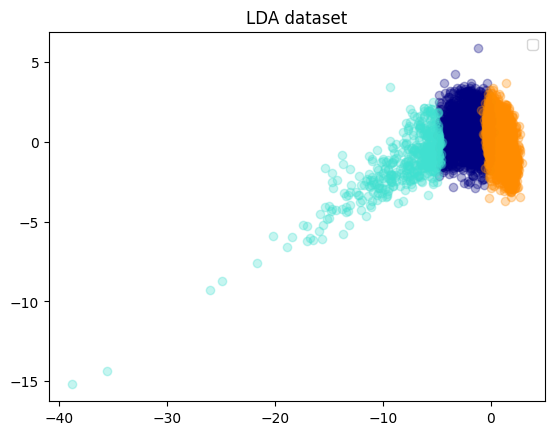

In [63]:
#scater plot of observations rescaled to the space of canonical discriminant functions
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
for color, i in zip(colors, [0,1,2,3]):
  plt.scatter(X_train_sc_ar_t[y_train_sc_ar==i, 0], X_train_sc_ar_t[y_train_sc_ar==i, 1], alpha=0.3, color=color)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA dataset")

plt.show() 

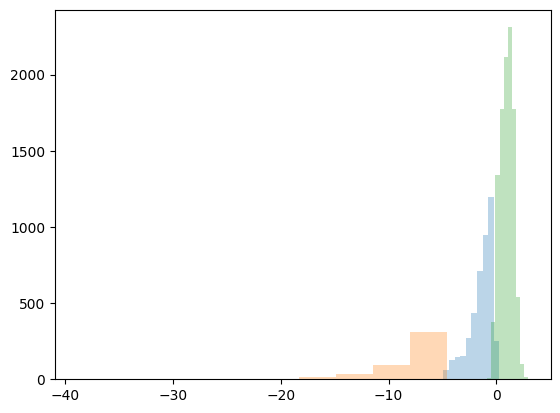

In [64]:

n=len(np.unique(y_train_sc_ar))
for i in range(0,n):
  plt.hist(X_train_sc_ar_t[y_train_sc_ar==i, 0],10, alpha=0.3)


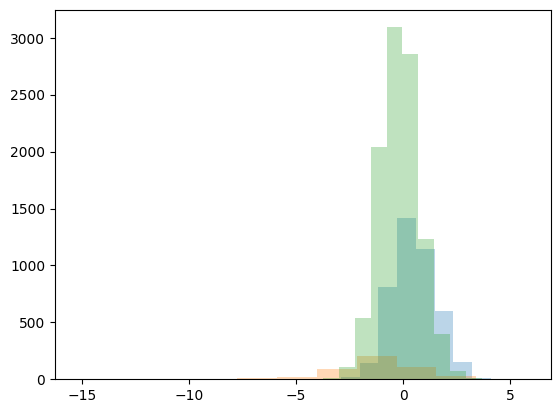

In [65]:
n=len(np.unique(y_train_sc_ar))
for i in range(0,n):
  plt.hist(X_train_sc_ar_t[y_train_sc_ar==i, 1],10, alpha=0.3)



```
Histograms of rescaled data for the 1st canonical discriminant function
```



(array([  64.,  127.,  149.,  151.,  274.,  436.,  712.,  944., 1198.,
         250.]),
 array([-4.923, -4.404, -3.885, -3.366, -2.848, -2.329, -1.81 , -1.292,
        -0.773, -0.254,  0.264]),
 <BarContainer object of 10 artists>)

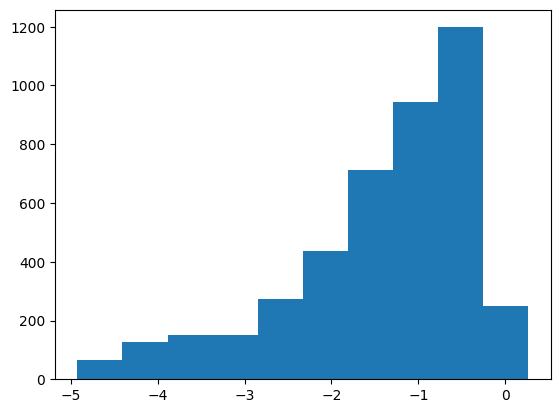

In [66]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==0, 0],10)


(array([  2.,   0.,   0.,   1.,   2.,   3.,  14.,  34.,  96., 308.]),
 array([-38.86 , -35.428, -31.996, -28.564, -25.133, -21.701, -18.269,
        -14.838, -11.406,  -7.974,  -4.543]),
 <BarContainer object of 10 artists>)

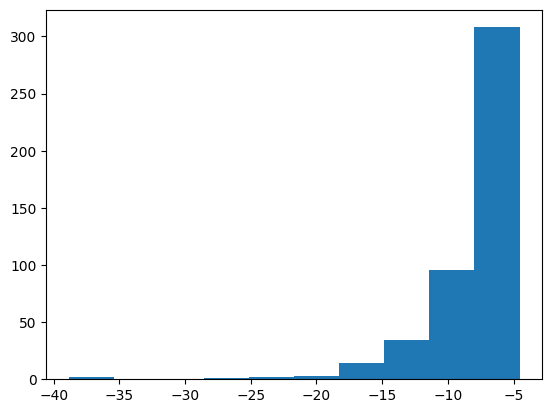

In [67]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==1, 0],10)


(array([  10.,  378., 1342., 1777., 2117., 2311., 1775.,  541.,   98.,
          13.]),
 array([-0.856, -0.475, -0.094,  0.287,  0.668,  1.049,  1.43 ,  1.811,
         2.192,  2.573,  2.954]),
 <BarContainer object of 10 artists>)

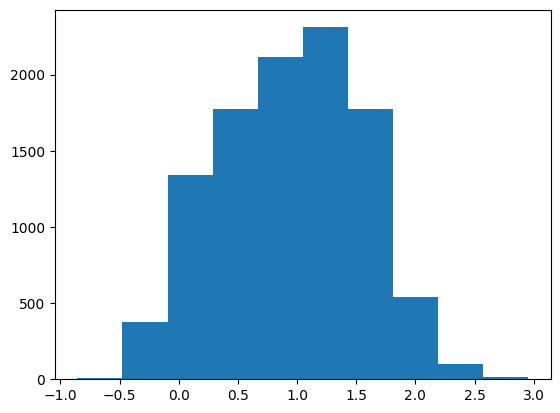

In [68]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==2, 0],10)

(array([  2.,   0.,   0.,   1.,   2.,   3.,  14.,  34.,  96., 308.]),
 array([-38.86 , -35.428, -31.996, -28.564, -25.133, -21.701, -18.269,
        -14.838, -11.406,  -7.974,  -4.543]),
 <BarContainer object of 10 artists>)

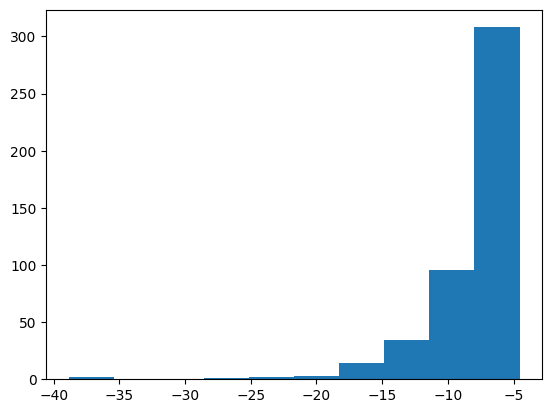

In [69]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==1, 0],10)



```
Histograms of rescaled data for the 2nd canonical discriminant function
```



(array([1.800e+01, 1.410e+02, 8.110e+02, 1.416e+03, 1.146e+03, 6.010e+02,
        1.560e+02, 1.400e+01, 1.000e+00, 1.000e+00]),
 array([-2.897, -2.023, -1.148, -0.273,  0.601,  1.476,  2.351,  3.225,
         4.1  ,  4.975,  5.849]),
 <BarContainer object of 10 artists>)

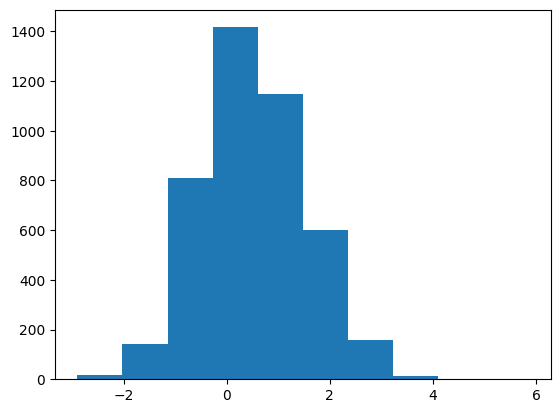

In [70]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==0,1],10)

(array([  2.,   0.,   0.,   2.,   8.,  20.,  88., 208., 107.,  25.]),
 array([-15.21 , -13.346, -11.483,  -9.619,  -7.756,  -5.892,  -4.029,
         -2.165,  -0.302,   1.562,   3.425]),
 <BarContainer object of 10 artists>)

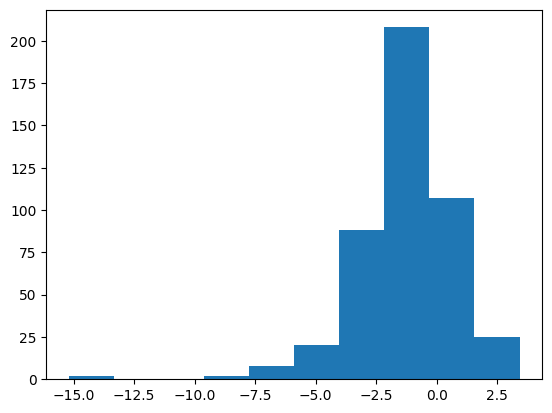

In [71]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==1,1],10)

(array([  11.,  109.,  538., 2037., 3092., 2857., 1234.,  399.,   76.,
           9.]),
 array([-3.721, -2.982, -2.244, -1.505, -0.766, -0.028,  0.711,  1.45 ,
         2.188,  2.927,  3.666]),
 <BarContainer object of 10 artists>)

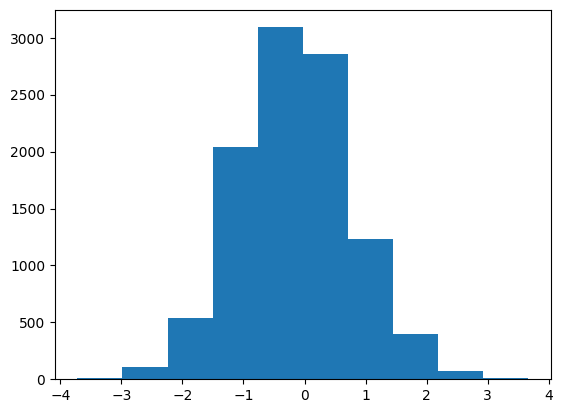

In [72]:
plt.hist(X_train_sc_ar_t[y_train_sc_ar==2,1],10)

In [73]:
# Overall mean value (centr of data sample)
lda.xbar_

array([ 2.954e-03, -4.090e-03,  1.979e-04, -6.270e-04,  3.225e-03,
        3.519e-03, -9.787e-05,  1.406e-03, -3.932e-03,  2.344e-03,
       -5.662e-03, -1.294e-04,  5.238e-03])

In [74]:
# Centers of classes 
lda.means_

array([[ 0.697,  0.368,  0.496,  0.668,  0.115,  0.323,  0.706,  0.604,
         0.257,  0.44 ,  0.091,  0.662,  0.111],
       [ 3.889,  0.845,  1.717,  2.346,  0.339,  0.731,  2.163,  2.036,
         1.058,  0.42 , -0.113,  1.829,  0.298],
       [-0.458, -0.196, -0.282, -0.383, -0.058, -0.162, -0.39 , -0.339,
        -0.159, -0.198, -0.041, -0.356, -0.052]])

#### Eigen values, Canonical correlation, Wilks stats and Chi-Sq calculation

#####Step 1: Computing the d-dimensional mean vectors

In [75]:
np.set_printoptions(precision=3)

In [76]:
cl_number = df['labels'].nunique()
X=np.array(X_train_sc)
y=np.array(y_train_sc)
mean_vectors = []

for cl in range(0,cl_number):
  mean_vectors.append(np.mean(X[y==cl], axis=0))
  print('Mean Vector class %s\n: %s\n' %(cl, mean_vectors[cl]))


Mean Vector class 0
: [0.697 0.368 0.496 0.668 0.115 0.323 0.706 0.604 0.257 0.44  0.091 0.662
 0.111]

Mean Vector class 1
: [ 3.889  0.845  1.717  2.346  0.339  0.731  2.163  2.036  1.058  0.42
 -0.113  1.829  0.298]

Mean Vector class 2
: [-0.458 -0.196 -0.282 -0.383 -0.058 -0.162 -0.39  -0.339 -0.159 -0.198
 -0.041 -0.356 -0.052]



#####Step 2: Computing the Scatter Matrices

######2.1 Within-class scatter matrix SW

In [77]:
n_columns = X.shape[1]

S_W=np.zeros((n_columns, n_columns))
row = np.zeros((1,n_columns))
for cl, mv in zip(range(0,cl_number), mean_vectors):
  class_sc_mat = np.zeros((n_columns, n_columns))
  mv = mv.reshape(n_columns, 1)
  for row in X[y==cl]:
    row = row.reshape(n_columns,1)
    class_sc_mat += ((row - mv)).dot((row-mv).T)
  print(cl) 
  print(class_sc_mat)
  S_W += class_sc_mat
print('within-class Scatter Matrix:\n', S_W)

0
[[ 1094.697   340.538   605.909   891.999    38.672   232.094   892.607
    777.199   396.874   -12.167  -119.155   810.471    14.377]
 [  340.538  4721.548  1528.008  1685.118   -98.82    415.925   638.795
   1365.819   941.443   -66.704   601.664   858.812   -90.376]
 [  605.909  1528.008  3540.977  2406.286   326.527  1374.208  1848.128
   2265.268   754.948  -274.718  1106.248  1516.019   413.369]
 [  891.999  1685.118  2406.286  3551.348   770.34   1020.981  2328.392
   3281.314  1230.068  -367.282  1558.267  2531.177   886.435]
 [   38.672   -98.82    326.527   770.34   7345.776  -121.101   507.918
    977.555  -230.614  -732.88   1525.712   514.151  5221.16 ]
 [  232.094   415.925  1374.208  1020.981  -121.101  3819.501  1453.658
   2128.689 -1864.766   -76.239   655.511   642.247   -42.247]
 [  892.607   638.795  1848.128  2328.392   507.918  1453.658  3706.597
   2823.873  -452.175  -365.755  1553.411  2568.695   671.272]
 [  777.199  1365.819  2265.268  3281.314   977.555  

######2.2 Between-class scatter matrix SB

In [78]:
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((n_columns,n_columns))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(n_columns,1) 
    overall_mean = overall_mean.reshape(n_columns, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[11224.724  3549.727  5898.617  8019.117  1227.412  3045.317  7841.13
   7066.557  3419.13   3010.787   267.98   6951.096  1113.416]
 [ 3549.727  1311.919  2027.535  2750.152   432.366  1125.813  2754.193
   2439.848  1141.941  1263.453   184.317  2485.852   398.081]
 [ 5898.617  2027.535  3238.59   4397.469   682.864  1739.696  4355.598
   3889.135  1848.714  1848.77    226.091  3899.122   624.47 ]
 [ 8019.117  2750.152  4397.469  5971.235   926.886  2359.717  5912.315
   5280.458  2511.303  2503.087   304.075  5291.307   847.441]
 [ 1227.412   432.366   682.864   926.886   144.537   371.001   921.508
    820.608   388.043   401.91     52.55    827.248   132.484]
 [ 3045.317  1125.813  1739.696  2359.717   371.001   966.108  2363.284
   2093.492   979.774  1084.438   158.292  2133.096   341.591]
 [ 7841.13   2754.193  4355.598  5912.315   921.508  2363.284  5875.438
   5233.755  2476.417  2554.533   331.549  5272.725   844.433]
 [ 7066.557  2439.848  38

#####Step 3: Solving the generalized eigenvalue problem for the matrix SW−1SB


```
Next, we will solve the generalized eigenvalue problem for the matrix SW-1SB to obtain the linear discriminants.
```




In [79]:
#Eigen values calculation
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(n_columns,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(13,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
ee=np.zeros((13,1))
k=0
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    ee[k]+=i[0]
    k+=1

eig_df=pd.DataFrame(ee)
eig_df


Eigenvector 1: 
[[-0.996]
 [-0.012]
 [ 0.034]
 [-0.014]
 [-0.011]
 [ 0.009]
 [-0.048]
 [ 0.009]
 [ 0.03 ]
 [ 0.047]
 [ 0.021]
 [-0.034]
 [-0.002]]
Eigenvalue 1: 3.10e+00

Eigenvector 2: 
[[-0.635]
 [ 0.111]
 [-0.108]
 [ 0.35 ]
 [ 0.045]
 [ 0.086]
 [ 0.332]
 [-0.218]
 [-0.054]
 [ 0.44 ]
 [-0.02 ]
 [ 0.294]
 [ 0.003]]
Eigenvalue 2: 1.43e-01

Eigenvector 3: 
[[ 0.155]
 [ 0.031]
 [-0.036]
 [-0.65 ]
 [ 0.014]
 [ 0.018]
 [ 0.095]
 [ 0.285]
 [-0.029]
 [ 0.091]
 [-0.011]
 [ 0.081]
 [ 0.001]]
Eigenvalue 3: -1.43e-03

Eigenvector 4: 
[[ 0.155]
 [ 0.031]
 [-0.036]
 [-0.65 ]
 [ 0.014]
 [ 0.018]
 [ 0.095]
 [ 0.285]
 [-0.029]
 [ 0.091]
 [-0.011]
 [ 0.081]
 [ 0.001]]
Eigenvalue 4: -1.43e-03

Eigenvector 5: 
[[-0.301]
 [-0.056]
 [ 0.067]
 [ 0.107]
 [-0.026]
 [-0.033]
 [-0.174]
 [ 0.357]
 [ 0.825]
 [-0.166]
 [ 0.021]
 [-0.149]
 [-0.002]]
Eigenvalue 5: -8.27e-05

Eigenvector 6: 
[[-0.274]
 [-0.077]
 [ 0.072]
 [ 0.059]
 [-0.023]
 [-0.031]
 [-0.204]
 [ 0.38 ]
 [ 0.83 ]
 [-0.115]
 [ 0.015]
 [-0.142]
 [-0.

,0
0,3.101458e+00
1,1.431101e-01
2,2.047610e-03
3,2.047610e-03
4,8.270703e-05
5,2.336162e-15
6,1.011294e-16
7,6.909405e-17
8,6.909405e-17
9,5.765607e-17


#####Step 4: Canonical Correlation Calculation

In [80]:
# Canonical correlation calculation
aa=(eig_df.apply(lambda x:x/(x+1),axis=1))
can_cor = aa.apply(np.sqrt)
print(can_cor)

               0
0   8.695886e-01
1   3.538272e-01
2   4.520427e-02
3   4.520427e-02
4   9.093964e-03
5   4.833386e-08
6   1.005631e-08
7   8.312283e-09
8   8.312283e-09
9   7.593160e-09
10  5.929868e-09
11  2.375673e-09
12  2.198692e-09


#####Step 5: Wilks-Labda and Chi-square calculation

In [82]:
import math

In [83]:
L = eig_df.apply(lambda x: 1/(x+1),axis=1)
n=X.shape[0]
p=13
g=3
k=-(n-(p+g)/2-1)
LL=pd.DataFrame(np.zeros((13,2)), columns=['Lambda','Chi-sq'])
for j in range(0,len(L)):
  LL['Lambda'][j]=L[0][j]
  for i in range(j,len(L)-1):
    LL['Lambda'][j]=LL['Lambda'][j]*(L[0][i+1])
LL['Chi-sq']=L[0].apply(math.log)
LL['Chi-sq']=LL['Chi-sq']*k
print(LL)

      Lambda        Chi-sq
0   0.212403  2.133668e+04
1   0.871163  2.022074e+03
2   0.995835  3.092412e+01
3   0.997874  3.092412e+01
4   0.999917  1.250313e+00
5   1.000000  3.692557e-11
6   1.000000 -0.000000e+00
7   1.000000 -0.000000e+00
8   1.000000 -0.000000e+00
9   1.000000 -0.000000e+00
10  1.000000 -0.000000e+00
11  1.000000 -0.000000e+00
12  1.000000 -0.000000e+00


### New LDA classifiers application and performance evaluaiton 

In [86]:
print('LDA intercept: ', Xlda.intercept_)
print('LDA coefficients: ', Xlda.coef_)

LDA intercept:  [ -2.407 -35.853  -0.83 ]
LDA coefficients:  [[ 2.254e+00  1.364e-01 -1.922e-01  5.691e-02  7.286e-02  5.621e-02
   4.458e-01  4.136e-02  1.937e-02  2.730e-01 -7.791e-02  3.682e-01
   6.961e-03]
 [ 1.735e+01 -6.619e-02 -2.733e-01 -3.135e-01  7.197e-02 -3.349e-01
   1.142e-02  7.324e-02 -5.242e-01 -1.766e+00 -2.834e-01 -1.384e-01
   1.871e-02]
 [-1.707e+00 -5.372e-02  9.197e-02 -9.728e-03 -3.346e-02 -8.486e-03
  -1.857e-01 -2.043e-02  1.523e-02 -3.506e-02  4.495e-02 -1.468e-01
  -3.722e-03]]


In [87]:
#LDA classifiers application for prediction on the base of test data sample
lda_predictions = lda.predict(X_test_sc_ar)


In [88]:
#confusion matrix calculation on the base of predicted data
confusion_matrix(y_test_sc_ar, lda_predictions)

array([[1361,    1,  403],
       [  19,  178,    0],
       [  31,    0, 4491]])

In [89]:
# Accuracy of DA classification functions
Xlda.score(X_test_sc_ar,y_test_sc_ar)

0.9299814929056138

In [90]:
#classification report calculation on the base of predicted data
print(classification_report(y_test_sc_ar, lda_predictions))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1765
           1       0.99      0.90      0.95       197
           2       0.92      0.99      0.95      4522

    accuracy                           0.93      6484
   macro avg       0.96      0.89      0.92      6484
weighted avg       0.93      0.93      0.93      6484



## Logistic Model creation on the base of rescaled data by means of CDF

In [ ]:
LogModel_lda = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=100)
LogModel_lda.fit(X_train_sc_ar_t, y_train_sc_ar)

LogisticRegression(multi_class='multinomial', random_state=100)

In [ ]:
y_pred = LogModel_lda.predict(X_test_sc_ar_t)

In [ ]:
confusion_matrix(y_test_sc_ar, y_pred)

array([[1686,    3,   76],
       [   7,  190,    0],
       [  69,    0, 4453]])

In [ ]:
print(classification_report(y_test_sc_ar, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1765
           1       0.98      0.96      0.97       197
           2       0.98      0.98      0.98      4522

    accuracy                           0.98      6484
   macro avg       0.97      0.97      0.97      6484
weighted avg       0.98      0.98      0.98      6484

